## LIBs

In [151]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier , RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
## !pip install xgboost

In [9]:
from xgboost import XGBClassifier

## FUNs

In [63]:
def check_shape(x_train,x_test,y_train,y_test):
    print('x_train shape: ',x_train.shape)
    print('y_train shape: ',y_train.shape)
    print('--'*20)
    print('x_test shape: ',x_test.shape)
    print('y_test shape: ',y_test.shape)

## DATA

In [34]:
df = pd.read_csv(r"D:\Work\Route\C07\ONline\New folder (2)\Ensemble Learning\XGBOOST_Data.csv")

In [36]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [38]:
df.drop(['Unnamed: 0','id'],axis = 1, inplace = True)

In [40]:
df.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [42]:
df.dropna(inplace= True)

In [44]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25893 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25893 non-null  object 
 1   Customer Type                      25893 non-null  object 
 2   Age                                25893 non-null  int64  
 3   Type of Travel                     25893 non-null  object 
 4   Class                              25893 non-null  object 
 5   Flight Distance                    25893 non-null  int64  
 6   Inflight wifi service              25893 non-null  int64  
 7   Departure/Arrival time convenient  25893 non-null  int64  
 8   Ease of Online booking             25893 non-null  int64  
 9   Gate location                      25893 non-null  int64  
 10  Food and drink                     25893 non-null  int64  
 11  Online boarding                    25893 non-null  int64  


In [28]:
encoder = LabelEncoder()

In [32]:
# df['Gender'] = encoder.fit_transform(df['Gender'])
# df['Customer Type'] = encoder.fit_transform(df['Customer Type'])
# df['ype of Travel'] = encoder.fit_transform(df['ype of Travel'])
# df['Untitled4'] = encoder.fit_transform(df['Untitled4'])
# df['satisfaction'] = encoder.fit_transform(df['satisfaction'])

In [50]:
df['Gender'].dtype.name

'object'

In [54]:
for col in df.columns:
    x = df[col].dtype.name
    if x == 'object':
        df[col] = encoder.fit_transform(df[col])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25893 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25893 non-null  int32  
 1   Customer Type                      25893 non-null  int32  
 2   Age                                25893 non-null  int64  
 3   Type of Travel                     25893 non-null  int32  
 4   Class                              25893 non-null  int32  
 5   Flight Distance                    25893 non-null  int64  
 6   Inflight wifi service              25893 non-null  int64  
 7   Departure/Arrival time convenient  25893 non-null  int64  
 8   Ease of Online booking             25893 non-null  int64  
 9   Gate location                      25893 non-null  int64  
 10  Food and drink                     25893 non-null  int64  
 11  Online boarding                    25893 non-null  int64  


In [58]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [60]:
df.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,...,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000
mean,0.493029,0.184683,39.621983,0.305604,0.592747,1193.753254,2.723709,3.046422,2.755996,2.976442,...,3.356969,3.385587,3.349786,3.632681,3.313907,3.648824,3.285521,14.225080,14.740857,0.438922
std,0.499961,0.388048,15.134224,0.460672,0.623777,998.626779,1.334711,1.532971,1.412552,1.281661,...,1.338643,1.282033,1.319045,1.176220,1.269138,1.180650,1.319355,37.185919,37.517539,0.496265
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,40.000000,0.000000,1.000000,849.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


In [65]:
x = df.drop(['satisfaction'],axis =1 )
y = df['satisfaction']

In [67]:
x_train, x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size = 0.2,
                                                 random_state = 0)

## Modeling -- Ensemble

### Adaboost

In [126]:
model = AdaBoostClassifier(n_estimators = 50)

In [128]:
model.fit(x_train,y_train)

AdaBoostClassifier()

In [129]:
y_pred = model.predict(x_test)

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2879
           1       0.93      0.90      0.91      2300

    accuracy                           0.93      5179
   macro avg       0.93      0.92      0.92      5179
weighted avg       0.93      0.93      0.93      5179



In [134]:
y.value_counts()

satisfaction
0    14528
1    11365
Name: count, dtype: int64

### XGBClassifier

In [141]:
xg_model = XGBClassifier(n_estimators = 200)

In [143]:
xg_model.fit(x_train,y_train)
y_pred_xg = xg_model.predict(x_test)
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2879
           1       0.96      0.93      0.95      2300

    accuracy                           0.95      5179
   macro avg       0.95      0.95      0.95      5179
weighted avg       0.95      0.95      0.95      5179



## Dif clas

In [ ]:
LR
SVM
DT
RF
Adaboost
XGboost

In [ ]:
1- learners in dic
2- create a function --> evalute the model (accuracy)
3- train all models , save all acc
4- plot for Acc
5- plot for Acc [identfy --> the best model] (bouns)

In [189]:
models= {
    'LogisticRegression' :LogisticRegression(),
   'SVM' :SVC(),
    'DT' :DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'Adaboost':AdaBoostClassifier(),
    'XGboost':XGBClassifier()
}

In [235]:
def evaluate_model(actual, pred,model_name):
    acc = accuracy_score(actual,pred)
    print(f'The acc of [{model_name}] model is --> ({round(acc*100,2)}) %')
    return acc

In [211]:
list(models)[0]

'LogisticRegression'

In [209]:
list(models.values())[1]

SVC()

In [203]:
range(len(models))

range(0, 6)

In [237]:
model_acc={}
model_pred={}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model_name = list(models)[i]
    
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    model_pred[model_name] = y_pred

    acc_score = evaluate_model(y_test,y_pred,model_name)
    model_acc[model_name] = acc_score*100

The acc of [LogisticRegression] model is --> (81.12) %
The acc of [SVM] model is --> (65.3) %
The acc of [DT] model is --> (93.18) %
The acc of [RF] model is --> (95.19) %
The acc of [Adaboost] model is --> (92.57) %
The acc of [XGboost] model is --> (95.13) %


In [255]:
max(list(model_acc.values()))

95.19212203128016

In [303]:
from scipy.stats import mode

model_pred_all = np.array(list(model_pred.values())).T
ct = mode(model_pred_all, axis =1).mode.flatten()
vote_acc = accuracy_score(y_test,ct)

In [305]:
vote_acc

0.9434253716933771

In [299]:
ct.shape

(5179,)

In [301]:
y_test.shape

(5179,)

In [289]:
print(model_pred_all)

[[1 0 1 1 1 1]
 [0 0 0 0 0 0]
 [1 0 1 1 1 1]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 1 1 1]]


In [281]:
model_pred_all.shape

(5179, 6)

In [283]:
model_pred_all

array([[1, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 1],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 1]])

In [265]:
y_test

21304    1
2141     0
3146     1
10874    0
25417    1
        ..
8914     0
18018    0
1612     0
21178    0
22304    1
Name: satisfaction, Length: 5179, dtype: int32

<Axes: >

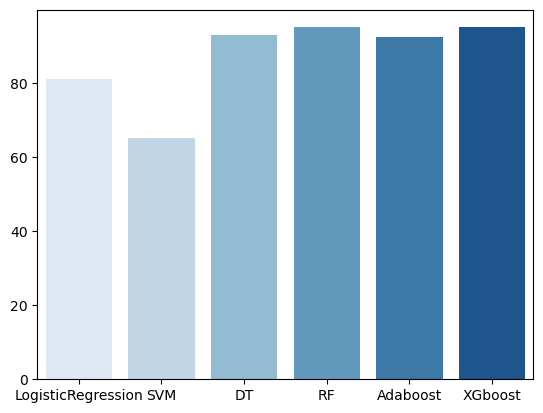

In [313]:
sns.barplot(x = list(model_acc.keys()),
           y = list(model_acc.values()),
           palette = 'Blues')